# 排球選手的資料分析

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## 1.抓入排球選手資料
#### 資料來源：107年企業十四年甲級男女排球聯賽官網(http://tvl.ctvba.org.tw/)

### 1-1先分別抓入男女排得分資料，並加入性別變項，將類別變項做編號

In [2]:
df = pd.read_html('http://tvl.ctvba.org.tw/%E5%A5%B3%E5%AD%90%E5%BE%97%E5%88%86%E6%8E%92%E8%A1%8C/')

In [3]:
df_girl = df[0][['球員', '位置', '得分']].copy()

In [4]:
df_girl['性別'] = np.array(0)

In [5]:
df1 = pd.read_html('http://tvl.ctvba.org.tw/%E7%94%B7%E5%AD%90%E5%BE%97%E5%88%86%E6%8E%92%E8%A1%8C/')

In [6]:
df_boy = df1[0][['球員', '位置', '得分']].copy()

In [7]:
df_boy['性別'] = np.array(1)

In [8]:
df_all =  pd.concat([df_boy, df_girl], axis = 0)

In [83]:
df_all.replace('主攻手', 0, inplace = True)
df_all.replace('中間手', 1, inplace = True)
df_all.replace('副攻手', 2, inplace = True)
df_all.replace('快攻手', 3, inplace = True)
df_all.replace('舉球員', 4, inplace = True)
df_all.replace('自由球員', 5, inplace = True)

In [10]:
df_all

,球員,位置,得分,性別
0,吳宗軒,2,502,1
1,黃世豪,0,383,1
2,張閔舜,0,313,1
3,張善源,0,290,1
4,焦璿誠,0,288,1
5,高偉誠,0,287,1
6,王明浚,2,261,1
7,宋柏霆,0,223,1
8,林宜暉,1,217,1
9,張育陞,2,192,1


### 1-2 再抓入其他變項的資料，並以球員姓名為key將Dataframe合併

In [86]:
df2 = pd.read_csv('player_data_final.csv')

In [98]:
attack = df2[1:].攻擊

In [40]:
df3 = df2[df2['場數'] == 24] #只抓相同場數的，避免得分受到此變項混淆

In [89]:
df_player_data = df3[['號碼', '姓名', '生日', '身高', '攻擊']].copy()

,號碼,姓名,生日,身高,攻擊
1,2,黃宇晨,10月30日,188.0,10
4,3,李佳軒,9月6日,171.0,--
6,6,詹旻翰,5月18日,190.0,56
9,7,戴儒謙,11月14日,184.0,15
12,8,莊邵捷,10月18日,195.0,11
15,10,張育陞,3月30日,188.0,159
18,13,黃建逢,12月31日,195.0,146
21,14,王明浚,7月30日,195.0,221
24,15,張善源,2月25日,187.0,253
27,16,顏振富,10月28日,198.0,102


In [48]:
df_player_data.dropna(inplace = True)


In [49]:
df_player_data.rename(columns ={'姓名':'球員'}, inplace = True)

In [50]:
df_final = pd.merge(df_all, df_player_data, how = 'left', on = '球員')

In [51]:
df_final.dropna(inplace = True)

#### 最後整理完成的球員資料

In [46]:
df_final

,球員,位置,得分,性別,號碼,生日,身高
0,吳宗軒,2,502,1,11,7月9日,186.0
1,黃世豪,0,383,1,5,1月1日,183.0
2,張閔舜,0,313,1,16,4月27日,180.0
3,張善源,0,290,1,15,2月25日,187.0
4,焦璿誠,0,288,1,20,6月9日,185.0
5,高偉誠,0,287,1,9,10月29日,180.0
6,王明浚,2,261,1,14,7月30日,195.0
7,宋柏霆,0,223,1,12,9月2日,186.0
8,林宜暉,1,217,1,19,2月19日,194.0
9,張育陞,2,192,1,10,3月30日,188.0


## 2.資料分析

### 2-1 先來看看是不是身高愈高的選手得分愈高？以選手身高預測得分

#### 先挑出隊上的攻擊手

In [73]:
df_test1 = df_final[(df_final['位置'] != 5) & (df_final['位置'] != 4)]

In [74]:
x = np.array(df_test1['身高'])
y = np.array(df_test1['得分'])

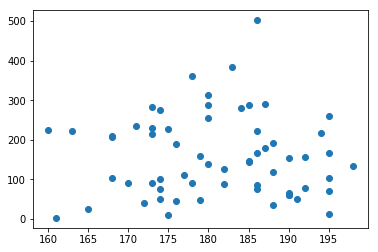

In [75]:
plt.scatter(x,y)

In [77]:
from sklearn.model_selection import train_test_split
X = x.reshape(len(x), 1)
#分離資料
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)
#開線性回歸
regr = LinearRegression()
#訓練
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [78]:
Y_pred = regr.predict(x_test)

#### 結果

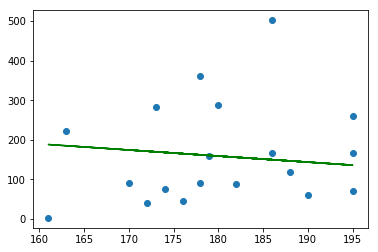

In [79]:
plt.scatter(x_test, y_test)
plt.plot(x_test, Y_pred, 'g')

In [82]:
print('Rsquared =', regr.score(x_train, y_train))

Rsquared = 0.02341744347377328


#### 結論2-1: 身高對得分的解釋變異量很低，看來得分的高低身高並不是最大的考量，不過得分當然還有跟隊上的戰術、配球、上場的局數有關，不過在此得不到資料。

### 2-2

In [11]:
X_data = df_all.iloc[:, 2:4]
Y_data = df_all.位置

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X_data, Y_data, test_size = 0.2, random_state = 100)

In [13]:
from sklearn.svm import SVC
clf = SVC()

In [14]:
clf.fit(x_train, y_train)

c:\users\ts105\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [15]:
y_predict = clf.predict(x_test)

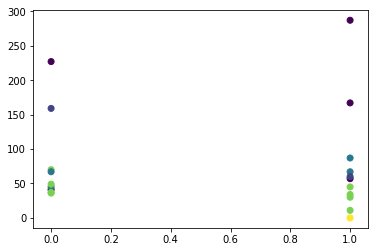

In [16]:
plt.scatter(x_test['性別'], x_test['得分'], c = y_test)

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
accuracy_score(y_test, y_predict)

0.4

In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
confusion_matrix(y_test, y_predict)

array([[5, 0, 0, 0, 0],
       [1, 1, 0, 0, 0],
       [4, 0, 0, 0, 0],
       [5, 2, 0, 1, 0],
       [0, 0, 0, 0, 1]], dtype=int64)

In [21]:
X, Y = np.meshgrid(np.arange(0, 5, 0.2), np.arange(0, 500, 10))

In [22]:
X1 = X.ravel()
Y1 = Y.ravel()

In [23]:
Z = clf.predict(np.c_[X1, Y1])

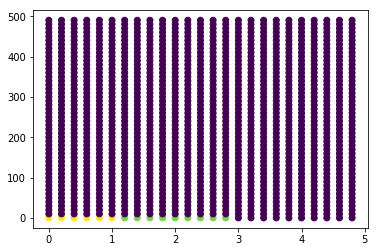

In [24]:
plt.scatter(X1, Y1, c = Z)

In [25]:
Z1 = Z.reshape(X.shape) #把Z的shape改成跟X一樣

In [26]:
Z1

array([[5, 5, 5, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

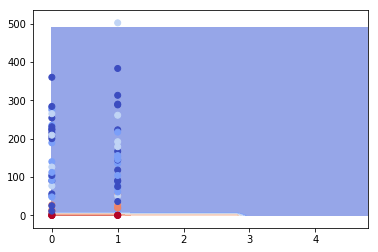

In [27]:
plt.contourf(X, Y, Z1, cmap = 'coolwarm', alpha = 0.6)
plt.scatter(x_train['性別'], x_train['得分'], c = y_train,  cmap = 'coolwarm')